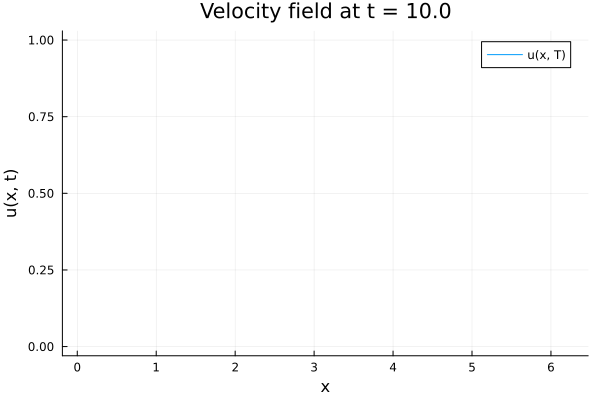

In [3]:
using LinearAlgebra
using Statistics
using Plots

# Parameters
L = 2π          # Domain length
N = 256         # Number of grid points
ν = 0.01        # Kinematic viscosity
T = 10.0        # Total simulation time
dt = 0.001      # Time step
Nt = Int(T / dt) # Number of time steps

# Grid
x = LinRange(0, L, N)
dx = x[2] - x[1]

# Initial condition (e.g., a sinusoidal perturbation)
u = sin.(x) + 0.1 * randn(N)

# Function to compute the derivative using finite differences
function derivative(u, dx)
    N = length(u)
    du = zeros(N)
    for i in 2:N-1
        du[i] = (u[i+1] - u[i-1]) / (2 * dx)
    end
    # Periodic boundary conditions
    du[1] = (u[2] - u[end]) / (2 * dx)
    du[end] = (u[1] - u[end-1]) / (2 * dx)
    return du
end

# Function to compute the second derivative
function second_derivative(u, dx)
    N = length(u)
    d2u = zeros(N)
    for i in 2:N-1
        d2u[i] = (u[i+1] - 2 * u[i] + u[i-1]) / dx^2
    end
    # Periodic boundary conditions
    d2u[1] = (u[2] - 2 * u[1] + u[end]) / dx^2
    d2u[end] = (u[1] - 2 * u[end] + u[end-1]) / dx^2
    return d2u
end

# Time-stepping loop
for t in 1:Nt
    # Compute the nonlinear term and the diffusion term
    u_x = derivative(u, dx)
    u_xx = second_derivative(u, dx)
    
    # Update the velocity field using Euler's method
    u += dt * (-u .* u_x + ν * u_xx)
end

# Compute the mean of u over the domain
mean_u = mean(u)

# Plot the final velocity field
plot(x, u, label="u(x, T)", xlabel="x", ylabel="u(x, t)", title="Velocity field at t = $T")

# println("Mean velocity over the domain: ", mean_u)